# Prepare

In [1]:
# These are my default settings
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import joblib

plt.rcParams["figure.figsize"] = (12, 6)
sns.set()
pd.set_option("display.max_columns", None)

In [2]:
# check abalability of gpu.  if  '/device:GPU:0', gpu is abalable
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [48]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Activation, Dropout, Flatten, Dense
from tensorflow.keras import optimizers

In [4]:
# set parameters
classes = ["Alien", "Predator"]
nb_classes = len(classes)

image_height = 150
image_width = 150

data = "../alien_vs_predator_ep2/Data"
os.listdir(data)

['Test', 'Train', 'Validation']

In [5]:
train_dir = f"{data}/Train"
valid_dir = f"{data}/Validation"

nb_train_samples = 494
nb_valid_samples = 200

nb_epoch = 500

# Get images (with Image Data Generator) --commented out. OOM with rtx3060 6GB

In [6]:
# train_datagen = ImageDataGenerator(
#     preprocessing_function = preprocess_input,
#     rescale = 1./255
# )
# valid_datagen = ImageDataGenerator(
    
#     rescale = 1./255
# )

In [7]:
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size = (image_width, image_height),
#     color_mode = "rgb",
#     classes = classes,
#     class_mode = "binary",
#     batch_size = 494
# )

# valid_generator = valid_datagen.flow_from_directory(
#     valid_dir,
#     target_size = (image_width, image_height),
#     color_mode = "rgb",
#     classes = classes,
#     class_mode = "binary",
#     batch_size = 200
# )

# Get Images 

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory as get_img

train_data = get_img(
    train_dir,
    image_size=(image_width, image_height),
    batch_size=494
)
valid_data = get_img(
    valid_dir,
    image_size=(image_width, image_height),
    batch_size=200
)


Found 494 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


# VGG16 (advanced) -- commented out

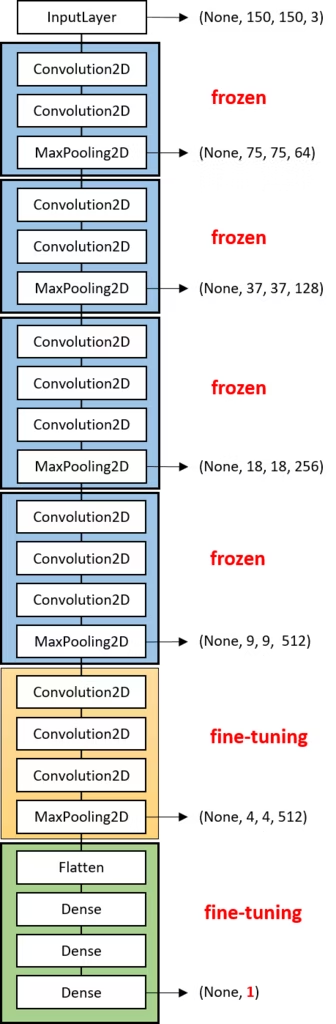

In [9]:
# # load VGG16 

# input_tensor = Input(shape=(image_width, image_height, 3))
# vgg16 = VGG16(include_top=False, weights="imagenet", input_tensor=input_tensor)

# # section green in image above
# base_model = Sequential()
# base_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
# base_model.add(Dense(units=256, activation='relu', input_dim=4 * 4 * 512))
# base_model.add(Dense(units=1, activation='sigmoid'))

# #  vgg16 + green
# vgg_model = Model(
#     inputs = vgg16.input,
#     outputs = base_model(vgg16.output)
# )

# # fix the wweights of blue section
# for layer in vgg_model.layers[:15]:
#     layer.trainable = False

In [10]:
# # compile
# vgg_model.compile(
#     loss = "binary_crossentropy",
#     optimizer='adam',
#     metrics=['accuracy']
# )

In [11]:
# # Fine-tuning

# print(tf.__version__)

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print("Physical GPUs: {}, Logical GPUs: {}".format(len(gpus), len(logical_gpus)))
# else:
#     print("CPU only")
    
# history = vgg_model.fit(
#     train_generator,
#     batch_size = nb_train_samples,
#     epochs = nb_epoch,
#     validation_data = valid_generator,
# )


# vgg16 simple + preprocess input

In [12]:
for X_train, y_train in train_data.take(1):
    print(type(X_train), X_train.shape, "\n", type(y_train), y_train.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'> (494, 150, 150, 3) 
 <class 'tensorflow.python.framework.ops.EagerTensor'> (494,)


In [13]:
for X_valid, y_valid in valid_data.take(1):
    print(type(X_valid), X_valid.shape, "\n", type(y_valid), y_valid.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'> (200, 150, 150, 3) 
 <class 'tensorflow.python.framework.ops.EagerTensor'> (200,)


In [14]:
#Scaling
X_train_np = X_train.numpy().astype("float32")
X_valid_np = X_valid.numpy().astype("float32")

print(
    " X_train_np :",type(X_train_np),X_train_np.shape,
    "\n",
    "X_valid_np :",type(X_valid_np),X_valid_np.shape
)

 X_train_np : <class 'numpy.ndarray'> (494, 150, 150, 3) 
 X_valid_np : <class 'numpy.ndarray'> (200, 150, 150, 3)


In [15]:
y_train

<tf.Tensor: shape=(494,), dtype=int32, numpy=
array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
     

In [16]:
vgg16 = VGG16(
    include_top = False,
    weights = "imagenet",
    input_shape = (150, 150, 3)
)
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# vgg16 predict

In [17]:
X_train_predict = vgg16.predict(
    preprocess_input(X_train_np)
)
X_valid_predict = vgg16.predict(
    preprocess_input(X_valid_np)
)

7/7 [==============================] - 0s 63ms/step


In [18]:
X_train_predict.shape

(494, 4, 4, 512)

# classification

In [34]:
# X_train_reshaped = X_train_predict.reshape(-1,1)

In [49]:
model = Sequential([
    Flatten(),
    Dense(256, activation='relu', input_dim=4 * 4 * 512),
    Dense(1, activation='sigmoid')
])


In [50]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [51]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [52]:
print(tf.__version__)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print("Physical GPUs: {}, Logical GPUs: {}".format(len(gpus), len(logical_gpus)))
else:
    print("CPU only")

history = model.fit(
    x = X_train_predict,
    y = y_train,
    batch_size = 494,
    epochs = 500,
    validation_data = (X_valid_predict, y_valid)
)

2.10.0
Physical GPUs: 1, Logical GPUs: 1
Epoch 1/500
1/1 [==============================] - 1s 642ms/step - loss: 5.3248 - accuracy: 0.4636 - val_loss: 4.2229 - val_accuracy: 0.7850
Epoch 2/500
1/1 [==============================] - 0s 56ms/step - loss: 2.4334 - accuracy: 0.8684 - val_loss: 6.0918 - val_accuracy: 0.8150
Epoch 3/500
1/1 [==============================] - 0s 54ms/step - loss: 2.2368 - accuracy: 0.9089 - val_loss: 5.2082 - val_accuracy: 0.8400
Epoch 4/500
1/1 [==============================] - 0s 55ms/step - loss: 1.0645 - accuracy: 0.9474 - val_loss: 2.3927 - val_accuracy: 0.8700
Epoch 5/500
1/1 [==============================] - 0s 55ms/step - loss: 0.1398 - accuracy: 0.9838 - val_loss: 1.3347 - val_accuracy: 0.9100
Epoch 6/500
1/1 [==============================] - 0s 55ms/step - loss: 0.0583 - accuracy: 0.9960 - val_loss: 1.2129 - val_accuracy: 0.9300
Epoch 7/500
1/1 [==============================] - 0s 61ms/step - loss: 0.0656 - accuracy: 0.9919 - val_loss: 1.4836 -

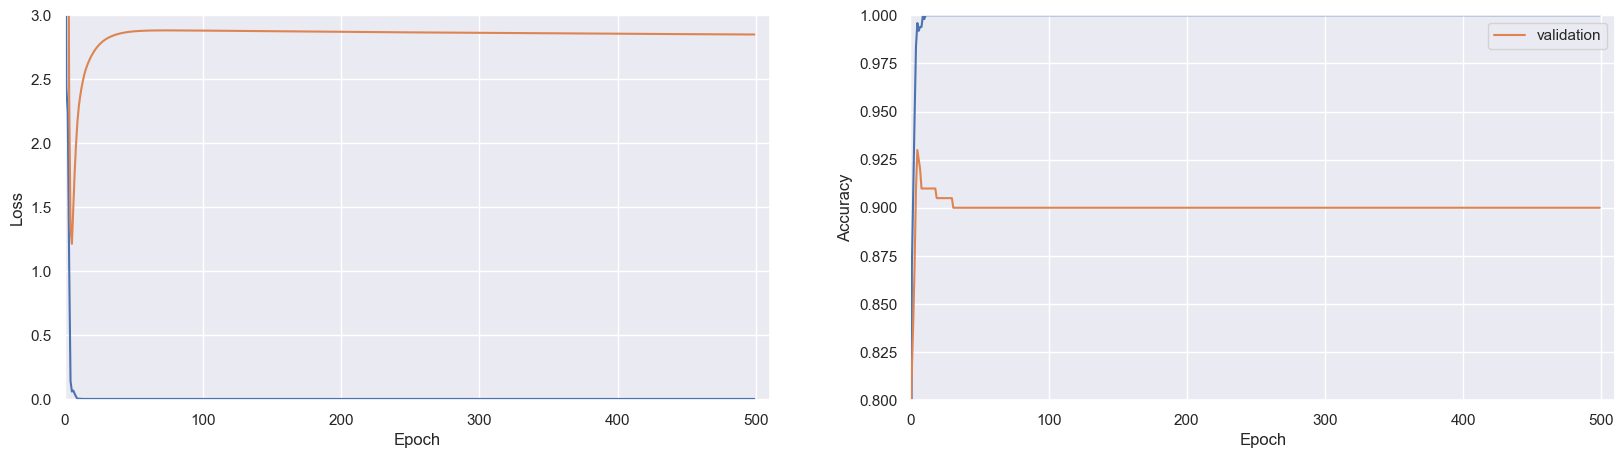

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))  # make 2 subplots

# subplot for loss
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'], label="validation")
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_xlim(0, 510)
ax[0].set_ylim(-0.01, 3)

# subplot for acc
ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'], label="validation")
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlim(0, 510)
ax[1].set_ylim(0.8, 1)
plt.legend()
plt.show()
